**First run this cell:**

In [1]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell but run it

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image,display

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import pandas as pd
import seaborn as sns
import numpy as np
import pylab as plt

# Assignment 1 (to do mostly in class)

## In class 1 (challenging).
- Read a csv file (DONE)
- Create an empty list (DONE)
- Loop over the column names of the dataframe, convert the column name to lowercase (.lower()) and append it to the empty list
- Make the new columns

In [2]:
#import pandas as pd
import pandas as pd

df_alcohol = pd.read_csv("data/alcohol.csv",sep="\t")
df_alcohol.head()

,adULTs,kiDs,IMCoMe,ConsUMe
0,2,2,758,1
1,2,3,1785,1
2,3,0,1200,1
3,1,0,545,1
4,4,1,547,1


In [3]:
df_alcohol.columns

Index(['adULTs', 'kiDs', 'IMCoMe', 'ConsUMe'], dtype='object')

In [4]:
#Create an empty list (DONE)
new_columns = []

In [5]:
#Create an empty list (DONE)
new_columns = []
#Loop over the columns
for column in df_alcohol.columns:
    #Convert the name to lower case
    new_name = column.lower()
    #Append it to the list of new_columns
    new_columns.append(new_name)
print(new_columns)

['adults', 'kids', 'imcome', 'consume']


In [6]:
#Change the column names of the dataframe with new_columns
df_alcohol.columns = new_columns

In [7]:
#Just to check if it's right
df_alcohol.head()

,adults,kids,imcome,consume
0,2,2,758,1
1,2,3,1785,1
2,3,0,1200,1
3,1,0,545,1
4,4,1,547,1


## In class 3 CONCAT
Concat df1 and df2

In [8]:
df1 = pd.DataFrame([[2001,2],[2002,3]],columns=["year","count"])
df2 = pd.DataFrame([[2003,4],[2004,3]],columns=["year","count"])
display(df1)
display(df2)

#Concat both files and shiw the resulting table
df = pd.concat([df1,df2])
df

,year,count
0,2001,2
1,2002,3


,year,count
0,2003,4
1,2004,3


,year,count
0,2001,2
1,2002,3
0,2003,4
1,2004,3


## In class 4 MERGE INNER (default)
Inner (default) merge df1 and df2

In [9]:
df1 = pd.DataFrame([[2001,2],[2002,3]],columns=["year","count"])
df2 = pd.DataFrame([[2001,"Mexico"],[2003,"China"]],columns=["year","place"])
display(df1)
display(df2)

#Inner merge both files and show the resulting table
#you wrtie down the variables you have in common
df = pd.merge(df1,df2, 
              left_on=["year"],
             right_on=["year"])
df

,year,count
0,2001,2
1,2002,3


,year,place
0,2001,Mexico
1,2003,China


,year,count,place
0,2001,2,Mexico


## In class 5 MERGE OUTER 
Outer merge df1 and df2

In [10]:
df1 = pd.DataFrame([[2001,2],[2002,3]],columns=["year","count"])
df2 = pd.DataFrame([[2001,"Mexico"],[2003,"China"]],columns=["year","place"])
display(df1)
display(df2)

#Outer merge both files  and show the resulting table
df = pd.merge(df1,df2,
              left_on=["year"],right_on=["year"],
              how="outer")
df

,year,count
0,2001,2
1,2002,3


,year,place
0,2001,Mexico
1,2003,China


,year,count,place
0,2001,2.0,Mexico
1,2002,3.0,NaN
2,2003,NaN,China


## In class 6 MELT
This dataset has variables in the column names, you'll need to melt it to have a nice, tidy dataset

In [11]:
df1 = pd.DataFrame([["Mexico",2,3,4],["China",22,12,3]],columns=["place","2000","2001","2002"])
df1


,place,2000,2001,2002
0,Mexico,2,3,4
1,China,22,12,3


In [12]:
#Variables present in columns already
variables_already_presents = ["place"]

#Variables to combine in one
columns_combine = ["2000","2001","2002"]

#Fix
melted_df1 = pd.melt(df1,id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="count")

#Convert the Year variable to numeric
melted_df1["Year"]  = melted_df1["Year"].astype(int)

#Print
melted_df1

,place,Year,count
0,Mexico,2000,2
1,China,2000,22
2,Mexico,2001,3
3,China,2001,12
4,Mexico,2002,4
5,China,2002,3


## In class 7 PIVOT
This dataset has several variables in one column, you'll need to pivot it to have a nice, tidy dataset

In [13]:
df1 = pd.DataFrame([["Mexico",2000,"temperature","25"],["Mexico",2001,"temperature","30"],["Mexico",2002,"temperature","35"],
                    ["Mexico",2000,"humidity","25"],["Mexico",2000,"humidity","25"],["Mexico",2000,"humidity","25"]],
                   columns=["place","year","variable","value"])
df1

,place,year,variable,value
0,Mexico,2000,temperature,25
1,Mexico,2001,temperature,30
2,Mexico,2002,temperature,35
3,Mexico,2000,humidity,25
4,Mexico,2000,humidity,25
5,Mexico,2000,humidity,25


In [14]:
df1.dtypes

place       object
year         int64
variable    object
value       object
dtype: object

In [15]:
#changing from string to integral
df1["value"] = df1["value"].astype(int)

In [16]:
#Columns already present
variables_already_present = ["place", "year"]

#Column with the variables
column_to_split = ["variable"]

#Column with the values
column_with_values = "value"

#Fix
pivoted_df1 = df1.pivot_table(column_with_values,
               variables_already_present,
               column_to_split)

pivoted_df1

variable     humidity  temperature
place  year                       
Mexico 2000      25.0         25.0
       2001       NaN         30.0
       2002       NaN         35.0

In [17]:
#take the blank space out and put the index back in
pivoted_df1 = pivoted_df1.reset_index()
pivoted_df1.reset_index()

variable,index,place,year,humidity,temperature
0,0,Mexico,2000,25.0,25.0
1,1,Mexico,2001,NaN,30.0
2,2,Mexico,2002,NaN,35.0


## In class 8 SCATTER + logarithmic variables
The file "data/revenue_marketCap.csv" has data on revenue and market capitalization for US publicly listed companies
- Read the file
- Plot the distributions of revenue and marketCap (sns.distplot())
- Transform the variables (take the log10)
- Fix the infinity values
- Make a scatter plot of Revenue vs MarketCap by Exchange

In [18]:
#Read the file

us_listed = pd.read_csv("data/revenue_marketCap.csv", sep="\t")
us_listed.head()

,Revenue,MarketCap,Exchange
0,7500000.0,13123024.0,New York Stock Exchange (NYSE)
1,7500000.0,16739323.0,New York Stock Exchange (NYSE)
2,350000.0,43392.0,New York Stock Exchange (NYSE)
3,350000.0,26674.0,NASDAQ National Market
4,93750.0,48840.0,NASDAQ National Market


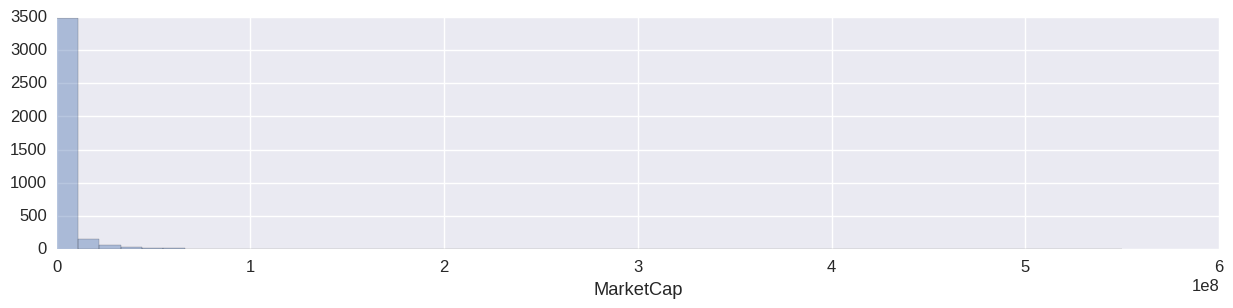

In [19]:
#Plot the distributions of revenue and marketcap and label the plots
#Take a look at http://seaborn.pydata.org/generated/seaborn.distplot.html
sns.set(font_scale=1.2)
plt.figure(figsize=(15,3))

sns.distplot(us_listed["MarketCap"], kde=False)
plt.xlabel("MarketCap")



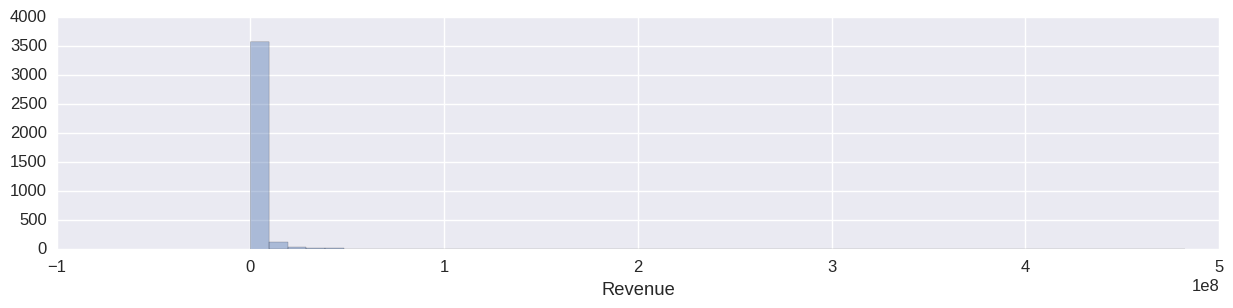

In [20]:
sns.set(font_scale=1.2)
plt.figure(figsize=(15,3))
sns.distplot(us_listed["Revenue"], kde=False)
plt.xlabel("Revenue")

In [21]:
#TRansform both variables
us_listed["log_Revenue"] = np.log10(us_listed["Revenue"])
us_listed["log_MarketCap"] = np.log10(us_listed["MarketCap"])
us_listed.head()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


,Revenue,MarketCap,Exchange,log_Revenue,log_MarketCap
0,7500000.0,13123024.0,New York Stock Exchange (NYSE),6.875061,7.118034
1,7500000.0,16739323.0,New York Stock Exchange (NYSE),6.875061,7.223738
2,350000.0,43392.0,New York Stock Exchange (NYSE),5.544068,4.637410
3,350000.0,26674.0,NASDAQ National Market,5.544068,4.426088
4,93750.0,48840.0,NASDAQ National Market,4.971971,4.688776


In [22]:
#Fix the infinity values
us_listed = us_listed.replace({np.inf:np.nan,-np.inf:np.nan})
us_listed = us_listed.dropna()

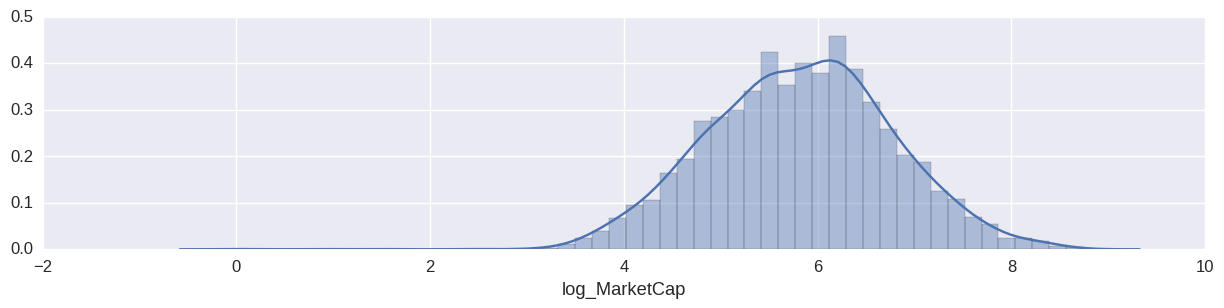

In [23]:
#Redo the plot with the distributions of revenue and marketcap
#Take a look at http://seaborn.pydata.org/generated/seaborn.distplot.html

sns.set(font_scale=1.2)
plt.figure(figsize=(15,3))

sns.distplot(us_listed["log_MarketCap"], kde=True)
plt.xlabel("log_MarketCap")

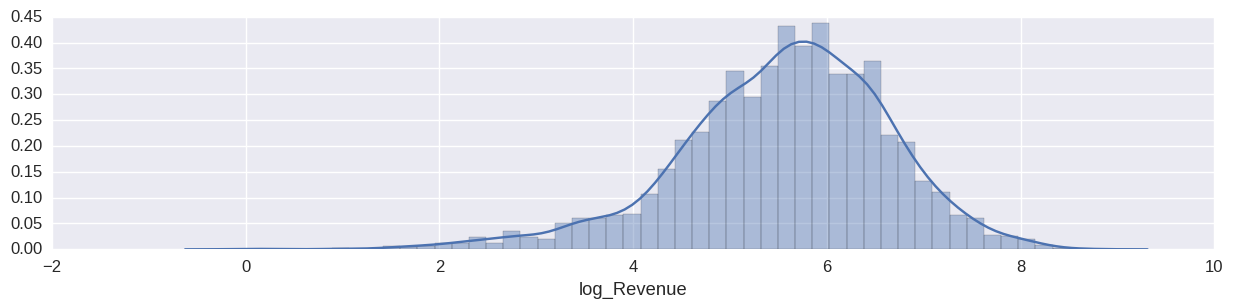

In [24]:
sns.set(font_scale=1.2)
plt.figure(figsize=(15,3))

sns.distplot(us_listed["log_Revenue"], kde=True)
plt.xlabel("log_Revenue")

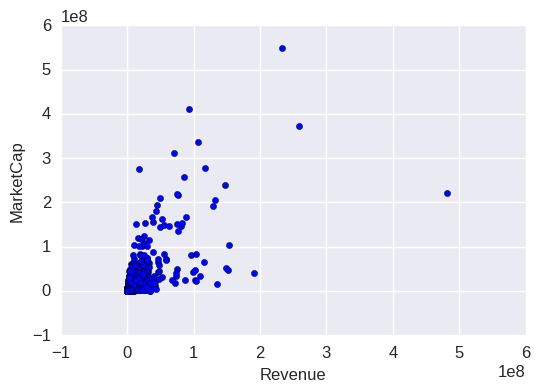

In [25]:
#Make a scatter plot
x = us_listed["Revenue"] 
y = us_listed["MarketCap"]


plt.figure(figsize=(6,4)) 


plt.scatter(x,y)
plt.xlabel("Revenue",fontsize=12)
plt.ylabel("MarketCap",fontsize=12)
plt.show()

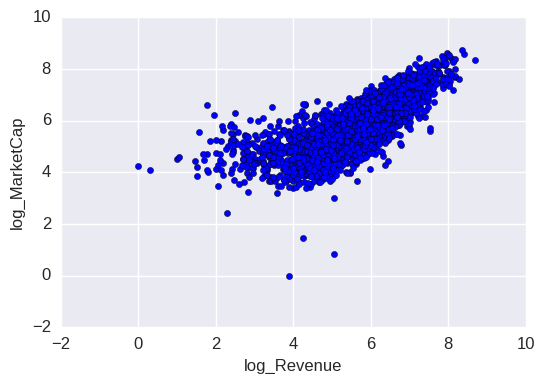

In [26]:
#make a SCATTER from the log values to make it more visible 

x = us_listed["log_Revenue"] 
y = us_listed["log_MarketCap"]


plt.figure(figsize=(6,4)) 


plt.scatter(x,y)
plt.xlabel("log_Revenue",fontsize=12)
plt.ylabel("log_MarketCap",fontsize=12)
plt.show()

# Assignment 2 (ungraded but important). Read some tutorials
Please play with the these ones (you should have them in the class1 folder if you downloaded them during the hw1):
- Chapter 4 - Find out on which weekday people bike the most with groupby and aggregate.ipynb
- Chapter 5 - Combining dataframes and scraping Canadian weather data.ipynb
- Chapter 6 - String Operations- Which month was the snowiest.ipynb
- Chapter 7 - Cleaning up messy data.ipynb

Read about outliers:
http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

# Assignment 3
- Read the dataset on cities using read_our_csv() (don't forget to run it first)
- Make a column with the country code (use the first two letters of METRO_ID)
- Remove the rows where METRO_ID has length 3 (i.e. the rows with the average of the entire country)
- Keep the metropolitan areas in the following countries
keep_countries = ['UK', 'AU', 'IT', 'NL', 'FR', 'PL', 'GR', 'HU', 'PO', 'PT', 'AT', 'DK', 'NO','CZ', 'IE', 'DE', 'FI',  'ES',  'SW', 'CH', 'SK',  'US', 'GB', 'BE']
- Create a dictionary matching those countries to a region: "Anglosphere", "South_EU", "Eastern_EU", "Scandinavia","Rest_EU"
- Make a column with the region of the country
- Keep the years 2000 and 2010 and make a plot visualizing "GDP_PC" vs "Year" for each region. The plot must show the variability within region
- Make a pointplot visualizing "UNEMP_R" vs "Year" for each region and all years (not only 2000 and 2010). Use ci=10 for the confidence intervals.


In [78]:
import pandas as pd
def read_our_csv():
    #reading the raw data from oecd
    df = pd.read_csv("../4_TidyData/data/CITIES_19122016195113034.csv",sep="\t")

    #fixing the columns (the first one is ""METRO_ID"" instead of "METRO_ID")
    cols = list(df.columns)
    cols[0] = "METRO_ID"
    df.columns = cols
    
    #pivot the table
    column_with_values = "Value"
    column_to_split = ["VAR"]
    variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
    df_fixed = df.pivot_table(column_with_values,
                 variables_already_present,
                 column_to_split).reset_index()
    
    return df_fixed
    

In [79]:
#Read the dataset on cities using read_our_csv() (don't forget to run it first)
read_our_csv()


VAR,METRO_ID,Metropolitan areas,Year,CO2_PC,ENTROPY_1000M,EQU_HOU_DISP_INC,GDP_PC,GINI_INC,GREEN_AREA_PC,LABOUR_PRODUCTIVITY,PCT_INTENSITY,POP_DENS,SPRAWL,UNEMP_R
0,AT001,Vienna,2000,12.77,NaN,NaN,45434.48,NaN,255.17,94254.60,0.90,267.27,NaN,4.77
1,AT001,Vienna,2001,NaN,NaN,NaN,45479.15,NaN,252.68,94805.82,0.97,269.90,NaN,4.83
2,AT001,Vienna,2002,NaN,NaN,NaN,46065.50,NaN,250.22,100463.10,1.06,272.56,NaN,5.82
3,AT001,Vienna,2003,NaN,NaN,NaN,45470.92,NaN,247.77,97851.61,1.15,275.26,NaN,6.24
4,AT001,Vienna,2004,NaN,NaN,NaN,46148.38,NaN,245.34,102259.13,1.34,277.99,NaN,7.20
5,AT001,Vienna,2005,15.42,NaN,NaN,46327.07,NaN,242.92,102121.39,1.31,280.75,NaN,7.37
6,AT001,Vienna,2006,NaN,NaN,NaN,47550.90,NaN,240.53,101338.84,1.67,283.54,-4.55,7.05
7,AT001,Vienna,2007,NaN,NaN,NaN,48254.48,NaN,238.15,101390.88,1.49,286.38,NaN,6.57
8,AT001,Vienna,2008,14.23,NaN,NaN,48755.43,NaN,235.79,102134.84,1.32,289.24,NaN,5.51
9,AT001,Vienna,2009,NaN,NaN,NaN,46862.31,NaN,233.44,98612.43,NaN,292.15,NaN,6.31


In [80]:
#Make a column with the country code (use the first two letters of METRO_ID)

df=read_our_csv()
df["country"] = df["METRO_ID"].apply(lambda x:x[:2]) 
df.head()


VAR,METRO_ID,Metropolitan areas,Year,CO2_PC,ENTROPY_1000M,EQU_HOU_DISP_INC,GDP_PC,GINI_INC,GREEN_AREA_PC,LABOUR_PRODUCTIVITY,PCT_INTENSITY,POP_DENS,SPRAWL,UNEMP_R,country
0,AT001,Vienna,2000,12.77,NaN,NaN,45434.48,NaN,255.17,94254.60,0.90,267.27,NaN,4.77,AT
1,AT001,Vienna,2001,NaN,NaN,NaN,45479.15,NaN,252.68,94805.82,0.97,269.90,NaN,4.83,AT
2,AT001,Vienna,2002,NaN,NaN,NaN,46065.50,NaN,250.22,100463.10,1.06,272.56,NaN,5.82,AT
3,AT001,Vienna,2003,NaN,NaN,NaN,45470.92,NaN,247.77,97851.61,1.15,275.26,NaN,6.24,AT
4,AT001,Vienna,2004,NaN,NaN,NaN,46148.38,NaN,245.34,102259.13,1.34,277.99,NaN,7.20,AT


In [81]:
#Remove the rows where METRO_ID has length 3 (i.e. the rows with the average of the entire country)
df.drop(["METRO_ID"]==3)
df.head()

VAR,METRO_ID,Metropolitan areas,Year,CO2_PC,ENTROPY_1000M,EQU_HOU_DISP_INC,GDP_PC,GINI_INC,GREEN_AREA_PC,LABOUR_PRODUCTIVITY,PCT_INTENSITY,POP_DENS,SPRAWL,UNEMP_R,country
0,AT001,Vienna,2000,12.77,NaN,NaN,45434.48,NaN,255.17,94254.60,0.90,267.27,NaN,4.77,AT
1,AT001,Vienna,2001,NaN,NaN,NaN,45479.15,NaN,252.68,94805.82,0.97,269.90,NaN,4.83,AT
2,AT001,Vienna,2002,NaN,NaN,NaN,46065.50,NaN,250.22,100463.10,1.06,272.56,NaN,5.82,AT
3,AT001,Vienna,2003,NaN,NaN,NaN,45470.92,NaN,247.77,97851.61,1.15,275.26,NaN,6.24,AT
4,AT001,Vienna,2004,NaN,NaN,NaN,46148.38,NaN,245.34,102259.13,1.34,277.99,NaN,7.20,AT


In [82]:
#Keep the metropolitan areas in the following countries
keep_countries = ['UK', 'AU', 'IT', 'NL', 'FR', 'PL', 'GR', 'HU', 'PO', 'PT', 'AT', 'DK', 'NO','CZ', 'IE', 'DE', 'FI',  'ES',  'SW', 'CH', 'SK',  'US', 'GB', 'BE']
df.head()

VAR,METRO_ID,Metropolitan areas,Year,CO2_PC,ENTROPY_1000M,EQU_HOU_DISP_INC,GDP_PC,GINI_INC,GREEN_AREA_PC,LABOUR_PRODUCTIVITY,PCT_INTENSITY,POP_DENS,SPRAWL,UNEMP_R,country
0,AT001,Vienna,2000,12.77,NaN,NaN,45434.48,NaN,255.17,94254.60,0.90,267.27,NaN,4.77,AT
1,AT001,Vienna,2001,NaN,NaN,NaN,45479.15,NaN,252.68,94805.82,0.97,269.90,NaN,4.83,AT
2,AT001,Vienna,2002,NaN,NaN,NaN,46065.50,NaN,250.22,100463.10,1.06,272.56,NaN,5.82,AT
3,AT001,Vienna,2003,NaN,NaN,NaN,45470.92,NaN,247.77,97851.61,1.15,275.26,NaN,6.24,AT
4,AT001,Vienna,2004,NaN,NaN,NaN,46148.38,NaN,245.34,102259.13,1.34,277.99,NaN,7.20,AT


In [109]:
#Create a dictionary matching those countries to a region: "Anglosphere", "South_EU", "Eastern_EU", "Scandinavia","Rest_EU"
#Usually you'd have another file with this, but here you can make the dictionary it by hand
country2region = {"UK":"Anglosphere", 
                 "US":"Angloshpere", 
                 "IE":"Angloshpere",
                 "GB":"Angloshpere", 
                 "AU":"Anglosphere", 
                 "IT": "South_EU", 
                 "ES": "South_EU", 
                 "GR": "South_EU", 
                 "PT": "South_EU", 
                 "FR": "South_EU", 
                 "CZ": "Eastern_EU",
                 "HU": "Eastern_EU", 
                 "PO": "Eastern_EU", 
                 "SK": "Eastern_EU",
                 "DK": "Scandinavia",
                 "NO": "Scandinavia", 
                 "FI": "Scandinavia", 
                 "SW": "Scandinavia",
                 "AT": "Rest_EU", 
                 "DE": "Rest_EU", 
                 "BE": "Rest_EU", 
                 "CH": "Rest_EU",
                 "NL": "Rest_EU"}
print(country2region["UK"])
         

Anglosphere


In [118]:
#Make a column with the region of the country

df["region"] = df["country"].apply(lambda x: d_c2coun.get(x))

KeyError: 'country'

In [92]:
#Keep the years 2000 and 2010
subset2000_10 = df.loc[df["Year"].isin([2005,2010]),:]

#Make a plot visualizing "GDP_PC" vs "Year" for each region for the years 2000 and 2010. 
#The plot must show the variability within region
#(e.g. https://seaborn.pydata.org/generated/seaborn.violinplot.html with the split option)




In [ ]:
#Make a pointplot visualizing "UNEMP_R" vs "Year" for each region for all years. Use ci=10 for the confidence intervals.



# Assignment 4
Let's look at the relationship between unemployment (%) and productivity (GDP/hours worked). In this exercise I am looking for answers that make sense logically, not for the real answer.

First answer the following questions
- Can you think of any circunstances where high unemployment causes high productivity next year?
Yes, through the informal economy.  
- Can you think of any circunstances where low unemployment causes high productivity next year?
Yes, a schock in demand can increase productivity.  
- Can you think of any circunstances where high productivity causes high unemployment next year?
Yes, advances in technology. Automatization of industrial activity, for instance.
- Can you think of any circunstances where low productivity causes high unemployment next year?
Yes, low productivity might create an unsustainable business that might have to fire its employees. 
- Can you think of any circunstances where an external variable make productivity and unemployment correlate positively?
Yes, investment in technology. 
- Can you think of any circunstances where an external variable make productivity and unemployment correlate negatively?
      
Next use the last dataset to plot (use lmplot) the relationship between x= "LABOUR_PRODUCTIVITY" and y="UNEMP_R" for the following sets of cities:
`["Valencia","Madrid","Barcelona","Zaragoza"]
["Rome","Bari","Genova","Turin"]
["Paris","Marseille","Lille","Montpellier","Toulouse"]`
- What do you see in the plots?
- Can you think of any reason for the differences between countries?



Finally, use the argument x_partial="GDP_PC", which controls for the increase of GDP causing an increase in unemployment  (x_partial regresses GDP out of LABOUR_PRODUCTIVITY, thus the effect of GDP is not included in LABOUR_PRODUCTIVITY anymore). Redo the three plots
- Is there any relationship between unemployment and productivity?
- Why could explain this relationship (or this lack of relationship)?





In [105]:
#Read the data
df = read_our_csv()

In [120]:
#Next use the last dataset to plot (use lmplot) the relationship between x= "LABOUR_PRODUCTIVITY" and y="UNEMP_R"
#for the following sets of cities:
#    ["Valencia","Madrid","Barcelona","Zaragoza"]
#    ["Rome","Bari","Genova","Turin"]
#    ["Paris","Marseille","Lille","Montpellier","Toulouse"]

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np


spain = df.loc[df["Metropolitan areas"] == ["Valencia", "Madrid", "Barcelona", "Zaragoza"]]
sns.lmplot(x="LABOUR_PRODUCTIVITY",y="UNEMP_R",data=df_spain, fit_reg=False,size=4,aspect=1.4)
plt.title("Spain")

italy = df.loc[df["Metropolitan areas"]== ["Rome","Bari","Genova", "Turin"]
sns.lmplot(x="LABOUR_PRODUCTIVITY",y="UNEMP_R",data=df_italy, fit_reg=False,size=4,aspect=1.4)
plt.title("Italy")

france = df.loc[df["Metropolitan areas"]== ["Paris", "Marseille", "Lille", "Montpellier", "Toulouse"]
sns.lmplot(x="LABOUR_PRODUCTIVITY",y="UNEMP_R",data=df_france, fit_reg=False,size=4,aspect=1.4)
plt.title("France")

SyntaxError: invalid syntax (<ipython-input-120-917bce607532>, line 18)

In [107]:
#Finally, use the argument x_partial="GDP_PC", which controls for the increase of GDP causing an increase in unemployment  
#(x_partial regresses GDP out of LABOUR_PRODUCTIVITY, thus the effect of GDP is not included in LABOUR_PRODUCTIVITY anymore). 
#Redo the three plots


sns.lmplot(...)
sns.lmplot(...)
sns.lmplot(...)

NameError: name 'sns' is not defined